In [38]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = 'MTX'

In [39]:
adata = sc.read_10x_mtx(
    DATA_PATH,
    var_names='gene_symbols',
    gex_only=False,
    cache=True)

adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 72317 × 36636
    var: 'gene_ids', 'feature_types'

In [40]:
adata.var

,gene_ids,feature_types
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression
...,...,...
IgD_TotalSeqB,IgD,Antibody Capture
IgM_TotalSeqB,IgM,Antibody Capture
LAG3_TotalSeqB,LAG3,Antibody Capture
TCRVa7.2_TotalSeqB,TCRVa7.2,Antibody Capture


In [41]:
adata.var.describe()

,gene_ids,feature_types
count,36636,36636
unique,36636,2
top,ENSG00000243485,Gene Expression
freq,1,36601


In [42]:
adata.var['feature_types'].value_counts()

feature_types
Gene Expression     36601
Antibody Capture       35
Name: count, dtype: int64

In [43]:
adata.var['Total counts'] = adata.X.sum(axis=0).A1

In [44]:
adata.var.describe()

,Total counts
count,3.663600e+04
mean,1.219822e+04
std,2.947327e+05
min,0.000000e+00
25%,1.000000e+00
50%,4.800000e+01
75%,1.911250e+03
max,3.084658e+07


In [45]:
adata.var

,gene_ids,feature_types,Total counts
MIR1302-2HG,ENSG00000243485,Gene Expression,0.0
FAM138A,ENSG00000237613,Gene Expression,0.0
OR4F5,ENSG00000186092,Gene Expression,0.0
AL627309.1,ENSG00000238009,Gene Expression,145.0
AL627309.3,ENSG00000239945,Gene Expression,9.0
...,...,...,...
IgD_TotalSeqB,IgD,Antibody Capture,1422630.0
IgM_TotalSeqB,IgM,Antibody Capture,7127866.0
LAG3_TotalSeqB,LAG3,Antibody Capture,41436.0
TCRVa7.2_TotalSeqB,TCRVa7.2,Antibody Capture,417350.0


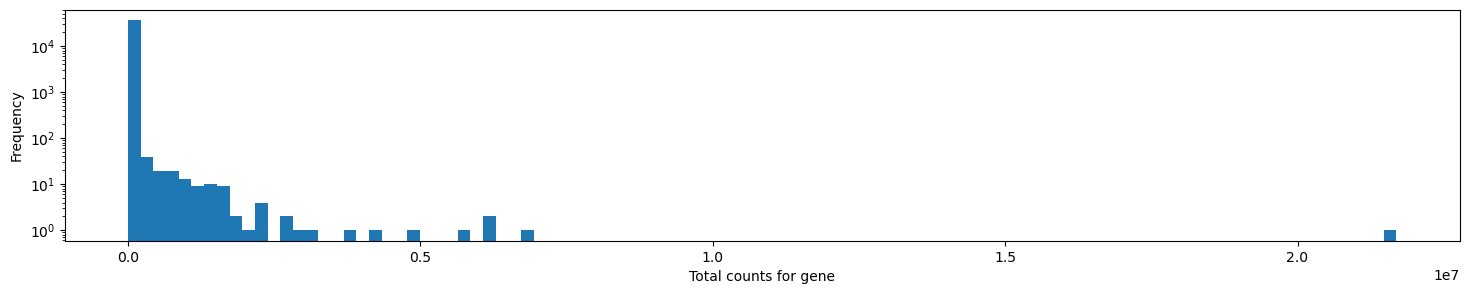

In [46]:
plt.figure(figsize=(18, 3))
adata.var[adata.var['feature_types'] == 'Gene Expression']['Total counts'].plot(kind='hist', bins=100, logy=True, logx=False)
plt.xlabel('Total counts for gene');

In [47]:
adata.var[adata.var['feature_types'] == 'Gene Expression'].describe()

,Total counts
count,3.660100e+04
mean,8.231513e+03
std,1.514445e+05
min,0.000000e+00
25%,1.000000e+00
50%,4.800000e+01
75%,1.888000e+03
max,2.168773e+07


c:\Users\giuli\anaconda3\lib\site-packages\scanpy\preprocessing\_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


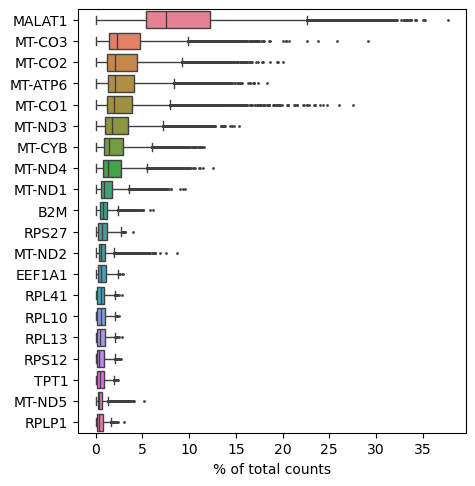

In [48]:
# visualize most highly expressed genes
sc.pl.highest_expr_genes(adata[:, adata.var['feature_types'] == 'Gene Expression'], n_top=20);

In [52]:
adata[:, adata.var['feature_types'] == 'Antibody Capture'].var_names = adata[
    :, adata.var['feature_types'] == 'Antibody Capture'].var_names.str.split('_').str[0]

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\preprocessing\_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\preprocessing\_normalization.py:233: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_qc.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  else adata.var[gene_symbols][top_idx]


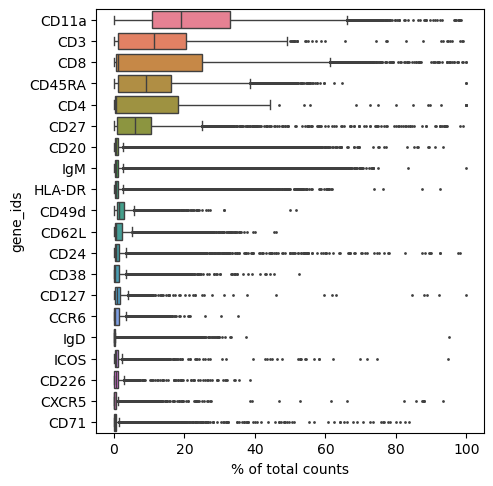

In [58]:
# visualize most highly expressed genes
sc.pl.highest_expr_genes(adata[:, adata.var['feature_types'] == 'Antibody Capture'], n_top=20, gene_symbols='gene_ids');

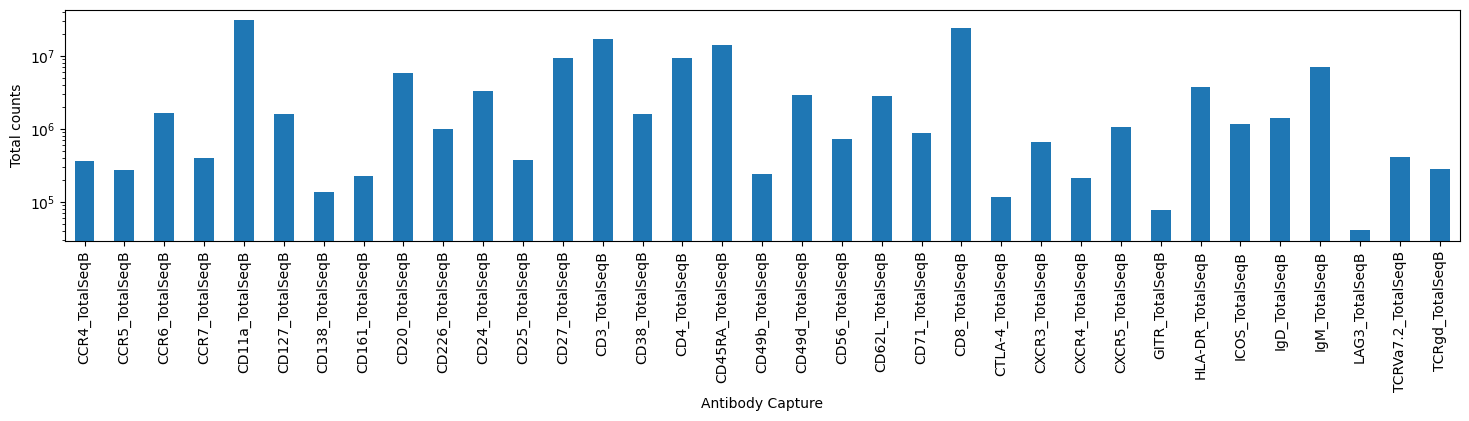

In [13]:
plt.figure(figsize=(18, 3))
adata.var[adata.var['feature_types'] == 'Antibody Capture']['Total counts'].plot(kind='bar', logy=True, logx=False)
plt.xlabel('Antibody Capture')
plt.ylabel('Total counts');

In [14]:
adata.obs['Total counts'] = adata.X.sum(axis=1).A1
adata.obs['Total counts antibody'] = adata[:, adata.var['feature_types'] == 'Antibody Capture'].X.sum(axis=1).A1
adata.obs['Total counts genes'] = adata[:, adata.var['feature_types'] == 'Gene Expression'].X.sum(axis=1).A1

In [15]:
adata.obs.describe()

,Total counts,Total counts antibody,Total counts genes
count,72317.000000,72317.000000,72317.000000
mean,6179.653809,2013.529541,4166.124023
std,4337.226074,2769.344482,2863.764160
min,314.000000,0.000000,311.000000
25%,3327.000000,1176.000000,1806.000000
50%,5464.000000,1650.000000,3433.000000
75%,8303.000000,2373.000000,6084.000000
max,302567.000000,283990.000000,40142.000000


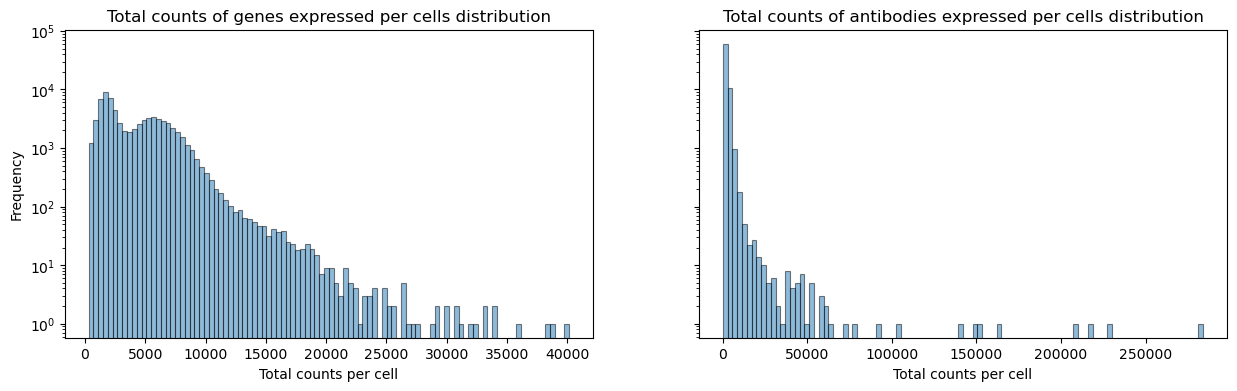

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), sharey=True)
adata.obs['Total counts genes'].plot(kind='hist', bins=100, logy=True, logx=False, ax=axs[0],
    edgecolor='black', linewidth=0.8, alpha=0.5)
axs[0].set_title('Total counts of genes expressed per cells distribution')
adata.obs['Total counts antibody'].plot(kind='hist', bins=100, logy=True, logx=False, ax=axs[1],
    edgecolor='black', linewidth=0.8, alpha=0.5)
axs[1].set_title('Total counts of antibodies expressed per cells distribution')
axs[0].set_xlabel('Total counts per cell')
axs[1].set_xlabel('Total counts per cell')
plt.show()

In [18]:
adata

AnnData object with n_obs × n_vars = 72317 × 36636
    obs: 'Total counts', 'Total counts antibody', 'Total counts genes'
    var: 'gene_ids', 'feature_types', 'Total counts'

In [20]:
adata.obs.describe()

,Total counts,Total counts antibody,Total counts genes
count,72317.000000,72317.000000,72317.000000
mean,6179.653809,2013.529541,4166.124023
std,4337.226074,2769.344482,2863.764160
min,314.000000,0.000000,311.000000
25%,3327.000000,1176.000000,1806.000000
50%,5464.000000,1650.000000,3433.000000
75%,8303.000000,2373.000000,6084.000000
max,302567.000000,283990.000000,40142.000000


### Only Genes

In [21]:
PATH = 'GSE239626'

adata = sc.read(PATH)

In [22]:
adata

AnnData object with n_obs × n_vars = 72317 × 36601
    obs: 'dataset', 'disease', 'cell_type', 'patiens', 'patiens_id', 'time'
    var: 'gene_ids', 'feature_types'

In [23]:
adata.obs

,dataset,disease,cell_type,patiens,patiens_id,time
AAACCCAAGACTGTTC-1,GSE239626,MS,PBMC,GSM7669046,N1,J0
AAACCCAAGGATCATA-1,GSE239626,MS,PBMC,GSM7669046,N1,J0
AAACCCAGTTATTCTC-1,GSE239626,MS,PBMC,GSM7669046,N1,J0
AAACCCATCATGAGGG-1,GSE239626,MS,PBMC,GSM7669046,N1,J0
AAACGAAAGCCAGTAG-1,GSE239626,MS,PBMC,GSM7669046,N1,J0
...,...,...,...,...,...,...
TTTGTTGAGCGTCGAA-20,GSE239626,MS,PBMC,GSM7669084,N5,M3
TTTGTTGAGTGTACCT-20,GSE239626,MS,PBMC,GSM7669084,N5,M3
TTTGTTGCAATTGCAC-20,GSE239626,MS,PBMC,GSM7669084,N5,M3
TTTGTTGCATTCAGCA-20,GSE239626,MS,PBMC,GSM7669084,N5,M3


In [25]:
len(adata.obs['patiens'].unique())

20

In [26]:
adata.obs['patiens'].unique()

['GSM7669046', 'GSM7669048', 'GSM7669050', 'GSM7669052', 'GSM7669054', ..., 'GSM7669076', 'GSM7669078', 'GSM7669080', 'GSM7669082', 'GSM7669084']
Length: 20
Categories (20, object): ['GSM7669046', 'GSM7669048', 'GSM7669050', 'GSM7669052', ..., 'GSM7669078', 'GSM7669080', 'GSM7669082', 'GSM7669084']

In [27]:
patiens = adata.obs['patiens'].unique()
adata.obs['patient_id'] = np.nan

# accoppia a due a due i pazienti
for i in range(0, len(patiens), 2):
    for index, row in adata.obs[adata.obs['patiens']==patiens[i]].iterrows():
        adata.obs.at[index, 'patient_id'] = patiens[i]+'-'+patiens[i+1]
    for index, row in adata.obs[adata.obs['patiens']==patiens[i+1]].iterrows():
        adata.obs.at[index, 'patient_id'] = patiens[i]+'-'+patiens[i+1]

C:\Users\giuli\AppData\Local\Temp\ipykernel_2120\2125955697.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'GSM7669046-GSM7669048' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  adata.obs.at[index, 'patient_id'] = patiens[i]+'-'+patiens[i+1]


In [28]:
adata.obs['patient_id'].unique()

array(['GSM7669046-GSM7669048', 'GSM7669050-GSM7669052',
       'GSM7669054-GSM7669056', 'GSM7669058-GSM7669060',
       'GSM7669062-GSM7669064', 'GSM7669066-GSM7669068',
       'GSM7669070-GSM7669072', 'GSM7669074-GSM7669076',
       'GSM7669078-GSM7669080', 'GSM7669082-GSM7669084'], dtype=object)

In [29]:
adata.obs['total_counts_genes'] = adata[:, adata.var['feature_types'] == 'Gene Expression'].X.sum(axis=1).A1

In [30]:
adata.obs.describe()

,total_counts_genes
count,72317.000000
mean,4166.124023
std,2863.764160
min,311.000000
25%,1806.000000
50%,3433.000000
75%,6084.000000
max,40142.000000


In [32]:
adata_grouped = adata.obs.groupby('patiens')
adata_grouped.describe()

C:\Users\giuli\AppData\Local\Temp\ipykernel_2120\2719042320.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_grouped = adata.obs.groupby('patiens')


total_counts_genes                                            \
                        count         mean          std    min      25%   
patiens                                                                   
GSM7669046             5491.0  6232.377930  2989.813721  311.0  4661.00   
GSM7669048             6018.0  5944.405273  3116.153076  373.0  3503.00   
GSM7669050             2583.0  3568.228027  2742.932129  328.0  1726.00   
GSM7669052             3143.0  4027.762939  3075.891602  355.0  1661.00   
GSM7669054             3579.0  3847.993408  2852.841553  503.0  1791.00   
GSM7669056             3884.0  3832.475342  2804.962646  317.0  1665.00   
GSM7669058             3809.0  3519.326904  2597.796875  474.0  1705.00   
GSM7669060             2822.0  3763.465332  2779.339600  446.0  1666.50   
GSM7669062             5006.0  4497.238770  2829.455811  500.0  2112.00   
GSM7669064             3160.0  3406.679199  2590.651367  432.0  1594.00   
GSM7669066             2945.0  4659.398438  2449.537842  351.0  2225.00   
GSM7669068             2709.0  4099.130859  2743.760498  452.0  1755.00   
GSM7669070             2956.0  2952.255371  2614.632080  449.0  1376.00   
GSM7669072             3715.0  4473.819824  2579.041992  335.0  1970.00   
GSM7669074             2543.0  4776.746582  2584.431641  449.0  2426.50   
GSM7669076             3946.0  2900.145508  2420.584717  408.0  1475.00   
GSM7669078             2779.0  3742.952881  2326.518799  408.0  1655.50   
GSM7669080             3964.0  3321.853516  2401.903320  329.0  1814.75   
GSM7669082             3423.0  3716.737549  2342.016357  318.0  1554.00   
GSM7669084             3842.0  3485.758057  2343.367920  400.0  1764.00   

                                      
               50%      75%      max  
patiens                               
GSM7669046  6413.0  7822.00  40142.0  
GSM7669048  6161.5  7715.00  38287.0  
GSM7669050  2401.0  5019.00  21706.0  
GSM7669052  3541.0  5691.50  38932.0  
GSM7669054  2657.0  5630.50  27790.0  
GSM7669056  2561.0  5653.00  29256.0  
GSM7669058  2580.0  4975.00  33825.0  
GSM7669060  2715.0  5504.25  32205.0  
GSM7669062  4227.5  6184.75  31364.0  
GSM7669064  2350.5  4857.25  21941.0  
GSM7669066  4911.0  6333.00  19381.0  
GSM7669068  3462.0  6124.00  29950.0  
GSM7669070  2005.5  3781.00  22534.0  
GSM7669072  4637.0  6308.50  25461.0  
GSM7669074  4989.0  6421.50  26231.0  
GSM7669076  1938.5  3755.50  26415.0  
GSM7669078  3580.0  5427.50  16089.0  
GSM7669080  2390.0  4357.25  32057.0  
GSM7669082  3574.0  5527.00  18089.0  
GSM7669084  2441.0  5006.00  22022.0

c:\Users\giuli\anaconda3\lib\site-packages\anndata\_core\anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


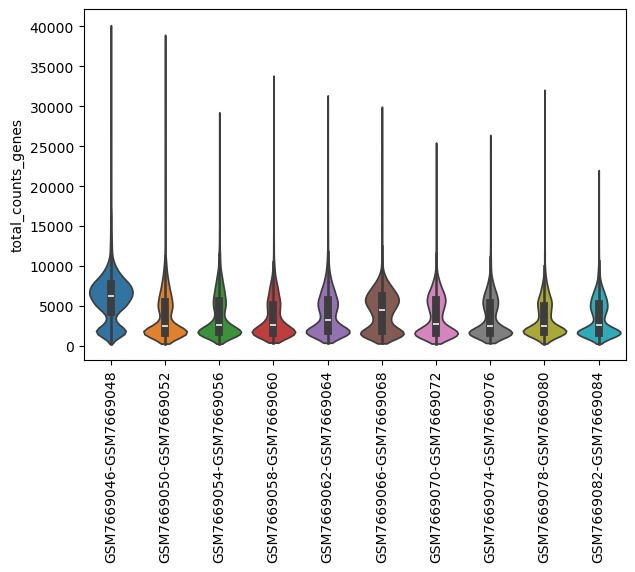

In [31]:
sc.pl.violin(
        adata[:, adata.var['feature_types'] == 'Gene Expression'],
        keys=['total_counts_genes'],
        groupby='patient_id',
        stripplot=False,
        inner='box',
        rotation=90,
    );